# Data Visualisation PP434 Project
#### Candidate number: 64689

## Financial Empowerment and Economic Stability

##### This document contains the data cleaning codes necessary for the creation of the graphs that are part of the final project.

### Importing packages:

In [181]:
pip install wbgapi pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install pandas pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [182]:
import wbgapi as wb
import pandas as pd
import altair as alt

In [53]:
import requests

In [110]:
import pycountry

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


# Chart 1

In [315]:
url = "https://raw.githubusercontent.com/CarlosGV1208/CarlosGV1208.github.io/refs/heads/main/project/p1/p1.csv"
df = pd.read_csv(url)

In [319]:
# Function to get ISO3 code 
def get_iso3_numeric(country_name):
    # manual adjust
    manual_map = {
        "Congo, Dem. Rep.": "180", # COD
        "Congo, Rep.": "178",      # COG
        "Egypt, Arab Rep.": "818", # EGY
        "Hong Kong SAR, China": "344", # HKG
        "Iran, Islamic Rep.": "364", # IRN
        "Korea, Rep.": "410", # KOR
        "Kyrgyz Republic": "417", # KGZ
        "Macedonia, FYR": "807", # MKD
        "Russia": "643",
        "Russian Federation": "643",
        "Slovak Republic": "703",
        "Taiwan, China": "158",
        "Venezuela, RB": "862",
        "West Bank and Gaza": "275", # Palestina
        "Yemen, Rep.": "887",
        "Côte d'Ivoire": "384",
        "Laos": "418",
        "Syria": "760"
    }
    
    if country_name in manual_map:
        return int(manual_map[country_name])
        
    try:
        match = pycountry.countries.search_fuzzy(country_name)
        if match:
            return int(match[0].numeric)
    except:
        return None

In [320]:
# Running the function
df['id'] = df['Country'].apply(get_iso3_numeric)

In [321]:
# Dropping missing values
df = df.dropna(subset=['id'])

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               142 non-null    object 
 1   financial knowledge   142 non-null    float64
 2   Risk Diversification  142 non-null    float64
 3   Inflation             142 non-null    float64
 4   Interest              142 non-null    float64
 5   Interest Compounding  142 non-null    float64
 6   id                    142 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.9+ KB


In [323]:
df

,Country,financial knowledge,Risk Diversification,Inflation,Interest,Interest Compounding,id
0,Afghanistan,0.14,0.19,0.35,0.40,0.26,4.0
1,Albania,0.14,0.11,0.50,0.33,0.30,8.0
2,Algeria,0.33,0.34,0.73,0.57,0.35,12.0
3,Angola,0.15,0.38,0.17,0.26,0.54,24.0
4,Argentina,0.28,0.33,0.65,0.45,0.31,32.0
...,...,...,...,...,...,...,...
138,Vietnam,0.24,0.25,0.55,0.31,0.46,704.0
139,West Bank and Gaza,0.25,0.35,0.59,0.37,0.31,275.0
140,"Yemen, Rep.",0.13,0.28,0.44,0.16,0.28,887.0
141,Zambia,0.40,0.54,0.51,0.45,0.56,894.0


In [324]:
# Convert data to numeric values

metrics = [
    'financial knowledge', 
    'Risk Diversification', 
    'Inflation', 
    'Interest', 
    'Interest Compounding'
]

for col in metrics:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['id'] = pd.to_numeric(df['id'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['id'])

# Convert to int
df['id'] = df['id'].astype(int)

#
print(df.dtypes)

Country                  object
financial knowledge     float64
Risk Diversification    float64
Inflation               float64
Interest                float64
Interest Compounding    float64
id                        int64
dtype: object


/var/folders/p7/_ml_f8590cg3dmhph8rb7ydc0000gn/T/ipykernel_84455/2168675137.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/p7/_ml_f8590cg3dmhph8rb7ydc0000gn/T/ipykernel_84455/2168675137.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = pd.to_numeric(df['id'], errors='coerce')


In [ ]:
# Saving the clean csv
output_filename = 'p1/p1_clean.csv'
df.to_csv(output_filename, index=False)

print(f"Archivo '{output_filename}' generado con éxito.")
print(df.head())

Archivo 'p1/p1_clean.csv' generado con éxito.
       Country  financial knowledge  Risk Diversification  Inflation  \
0  Afghanistan                 0.14                  0.19       0.35   
1      Albania                 0.14                  0.11       0.50   
2      Algeria                 0.33                  0.34       0.73   
3       Angola                 0.15                  0.38       0.17   
4    Argentina                 0.28                  0.33       0.65   

   Interest  Interest Compounding  id  
0      0.40                  0.26   4  
1      0.33                  0.30   8  
2      0.57                  0.35  12  
3      0.26                  0.54  24  
4      0.45                  0.31  32  


# Chart 2

In [ ]:
# World Bank API wbgapi

# To view all indicators
#wb.series.info()

In [ ]:
# Define the indicators from Global Findex and World Bank

# fx.acc.t.d: % of adults with a bank account
# NY.GNS.ICTR.ZS: Gross national savings % of GDP
# NY.GDP.PCAP.CD: GDP per capita (current US$)

indicators = {
    'FX.OWN.TOTL.ZS': 'Account_Ownership',
    'NY.GNS.ICTR.ZS': 'Gross_Savings',
    'NY.GDP.PCAP.CD': 'GDP_per_Capita'
}

In [4]:
year_to_fetch = 2024

In [13]:
df = wb.data.DataFrame(indicators.keys(), time=year_to_fetch, labels=True, skipAggs=True).reset_index()

In [14]:
df

,economy,Country,FX.OWN.TOTL.ZS,NY.GDP.PCAP.CD,NY.GNS.ICTR.ZS
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213
1,ZMB,Zambia,72.702425,1187.109434,34.421066
2,YEM,"Yemen, Rep.",NaN,NaN,NaN
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN
...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN
213,ASM,American Samoa,NaN,NaN,NaN
214,DZA,Algeria,35.290107,5752.990767,39.419856
215,ALB,Albania,46.069251,11377.775743,22.501612


In [27]:
df_regions = pd.DataFrame(wb.economy.list())[['id', 'value', 'region']]

In [ ]:
# Cleaning and renaming
df = df.rename(columns={
        'economy': 'ISO3',
        'Country': 'country_name',
        'NY.GNS.ICTR.ZS': 'gross_savings_GDP',
        'FX.OWN.TOTL.ZS': 'account_ownership',
        'NY.GDP.PCAP.CD': 'GDP_per_capita'
    })

In [29]:
df_final = pd.merge(df, df_regions[['id', 'region']], left_on='ISO3', right_on='id', how='left')

In [30]:
df

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213
1,ZMB,Zambia,72.702425,1187.109434,34.421066
2,YEM,"Yemen, Rep.",NaN,NaN,NaN
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN
...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN
213,ASM,American Samoa,NaN,NaN,NaN
214,DZA,Algeria,35.290107,5752.990767,39.419856
215,ALB,Albania,46.069251,11377.775743,22.501612


In [31]:
df_final

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP,id,region
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213,ZWE,SSF
1,ZMB,Zambia,72.702425,1187.109434,34.421066,ZMB,SSF
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,YEM,MEA
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263,PSE,MEA
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,VIR,LCN
...,...,...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN,AND,ECS
213,ASM,American Samoa,NaN,NaN,NaN,ASM,EAS
214,DZA,Algeria,35.290107,5752.990767,39.419856,DZA,MEA
215,ALB,Albania,46.069251,11377.775743,22.501612,ALB,ECS


In [35]:
df_final['region'].unique()

array(['SSF', 'MEA', 'LCN', 'EAS', 'ECS', 'NAC', 'SAS'], dtype=object)

In [ ]:
# Drop nule values
df_clean = df_final.dropna(subset=['gross_savings_GDP', 'account_ownership', 'GDP_per_capita'])
df_clean

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP,id,region
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213,ZWE,SSF
1,ZMB,Zambia,72.702425,1187.109434,34.421066,ZMB,SSF
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263,PSE,MEA
5,VNM,Viet Nam,70.550753,4717.290287,36.690108,VNM,EAS
8,UZB,Uzbekistan,59.658383,3161.700106,28.297617,UZB,ECS
...,...,...,...,...,...,...,...
206,AUS,Australia,98.010378,64603.985631,22.922852,AUS,EAS
208,ARM,Armenia,71.373473,8556.214070,19.235686,ARM,ECS
209,ARG,Argentina,81.744245,13969.783660,16.697117,ARG,LCN
214,DZA,Algeria,35.290107,5752.990767,39.419856,DZA,MEA


In [ ]:
# Save csv
df_clean.to_csv('ownership_savings.csv', index=False)
    
print(f"¡Éxito! Datos guardados para {len(df_clean)} países.")
print(df_clean[['country_name', 'gross_savings_GDP', 'account_ownership', 'GDP_per_capita', 'region']].head())

¡Éxito! Datos guardados para 111 países.
         country_name  gross_savings_GDP  account_ownership  GDP_per_capita  \
0            Zimbabwe          10.700213          49.521602     2497.203322   
1              Zambia          34.421066          72.702425     1187.109434   
3  West Bank and Gaza           1.883263          39.620984     2592.305912   
5            Viet Nam          36.690108          70.550753     4717.290287   
8          Uzbekistan          28.297617          59.658383     3161.700106   

  region  
0    SSF  
1    SSF  
3    MEA  
5    EAS  
8    ECS  


# Chart 3

In [326]:
df = pd.read_csv('https://raw.githubusercontent.com/CarlosGV1208/CarlosGV1208.github.io/refs/heads/main/project/p3/p3.csv') 

In [327]:
df

,Country,men,women,gender gap,high income,low income,wealth gap,age 30-59,age 18-29,age gap
0,Albania,62.76,52.58,10.18,70.33,46.57,23.76,59.40,66.33,-6.93
1,Brazil,56.56,49.87,6.69,57.61,50.01,7.60,53.66,54.38,-0.72
2,Cambodia,42.32,40.79,1.53,44.45,40.24,4.21,41.98,43.16,-1.17
3,Chile,64.57,59.32,5.25,68.79,58.17,10.62,62.86,57.91,4.95
4,Costa Rica,60.24,58.07,2.17,64.13,56.23,7.90,59.96,58.27,1.69
5,Croatia,71.70,68.56,3.14,73.61,64.89,8.72,71.63,70.46,1.17
6,Cyprus,74.07,71.44,2.63,76.35,63.34,13.01,75.67,66.40,9.27
7,Estonia,84.95,73.56,11.39,84.64,71.24,13.41,79.24,81.17,-1.93
8,Finland,75.30,63.43,11.86,78.90,63.20,15.71,69.97,50.63,19.33
9,France,70.13,61.95,8.18,70.62,60.25,10.36,62.80,57.04,5.76


In [ ]:
# Call columns to change as rows
columnas_indicadores = [
    'men', 'women', 'gender gap',
    'high income', 'low income', 'wealth gap',
    'age 30-59', 'age 18-29', 'age gap'
]

# Convert to long format
df_long = df.melt(
    id_vars=['Country'], 
    value_vars=columnas_indicadores,
    var_name='indicator', 
    value_name='value'
)

# Create a category column to facilitate filters in vegalite
def asignar_categoria(row):
    ind = row['indicator']
    if ind in ['men', 'women', 'gender gap']:
        return 'Gender'
    elif ind in ['adults in the richest households', 'adults in the poorest households', 'wealth gap']:
        return 'Wealth'
    elif ind in ['age 35-54', 'age 15-34', 'age gap']:
        return 'Age'
    return 'Other'

df_long['category'] = df_long.apply(asignar_categoria, axis=1)



In [ ]:
# Save file
df_long.to_csv('p3/p3_long.csv', index=False)



In [301]:
print(df_long.head(10))

      Country indicator  value category
0     Albania       men  62.76   Gender
1      Brazil       men  56.56   Gender
2   Cambodia        men  42.32   Gender
3       Chile       men  64.57   Gender
4  Costa Rica       men  60.24   Gender
5    Croatia        men  71.70   Gender
6     Cyprus        men  74.07   Gender
7     Estonia       men  84.95   Gender
8    Finland        men  75.30   Gender
9     France        men  70.13   Gender


# Chart 5

In [328]:
df = pd.read_csv('https://raw.githubusercontent.com/CarlosGV1208/CarlosGV1208.github.io/refs/heads/main/project/p5/p5.csv')

In [169]:
df = df.rename(columns={'Country or Economy': 'Country'})

In [ ]:
# Change from wide to long format
df_long = df.melt(
    id_vars=['Country'], 
    var_name='Concept', 
    value_name='Score'
)

In [ ]:
# Change scores to numeric values
df_long['Score'] = pd.to_numeric(df_long['Score'], errors='coerce')

In [172]:
df_long

,Country,Concept,Score
0,Albania,Time value of money,71.100765
1,Brazil,Time value of money,54.400003
2,Cambodia,Time value of money,23.051018
3,Chile,Time value of money,62.046206
4,Costa Rica,Time value of money,53.418803
...,...,...,...
307,Thailand,Risk diversification,68.118048
308,Uruguay,Risk diversification,60.916120
309,Yemen,Risk diversification,57.032996
310,Overall Average,Risk diversification,58.849994


In [ ]:
# 5. Save long format csv for Vega-Lite
df_long.to_csv('p5/p5_long.csv', index=False)

print("Archivo 'p5_long.csv' creado exitosamente.")
print(df_long.head())

Archivo 'p5_long.csv' creado exitosamente.
      Country              Concept      Score
0     Albania  Time value of money  71.100765
1      Brazil  Time value of money  54.400003
2   Cambodia   Time value of money  23.051018
3       Chile  Time value of money  62.046206
4  Costa Rica  Time value of money  53.418803


# Chart 7

In [331]:
df = pd.read_csv('https://raw.githubusercontent.com/CarlosGV1208/CarlosGV1208.github.io/refs/heads/main/project/p7/p7.csv')

In [332]:
df = df.rename(columns={'Country or Economy': 'Country'})

In [333]:
# Change to long format
df_long = df.melt(
    id_vars=['Country'], 
    var_name='Concept', 
    value_name='Score'
)

In [334]:
# Change to numeric scores
df_long['Score'] = pd.to_numeric(df_long['Score'], errors='coerce')

In [335]:
# Save long format csv to use in Vega-Lite
df_long.to_csv('p7/p7_long.csv', index=False)

print(df_long.head())

      Country                                 Concept      Score
0     Albania  Keeps track of money in the short term  64.454222
1      Brazil  Keeps track of money in the short term  79.549998
2   Cambodia   Keeps track of money in the short term  35.361597
3       Chile  Keeps track of money in the short term  55.033004
4  Costa Rica  Keeps track of money in the short term  59.059829


# Chart 6

### Inflation vs Financial inclusion

In [339]:
# Download from the World Bank API the data on account ownership and registration in financial institutions.

inflation = wb.data.DataFrame('FP.CPI.TOTL.ZG', time=2024, labels=True, skipAggs=True).reset_index()
accounts = wb.data.DataFrame('FX.OWN.TOTL.ZS', time=2024, labels=True, skipAggs=True).reset_index()

In [340]:
inflation

,economy,Country,FP.CPI.TOTL.ZG
0,ZWE,Zimbabwe,NaN
1,ZMB,Zambia,14.985626
2,YEM,"Yemen, Rep.",NaN
3,PSE,West Bank and Gaza,53.669146
4,VIR,Virgin Islands (U.S.),NaN
...,...,...,...
212,AND,Andorra,NaN
213,ASM,American Samoa,NaN
214,DZA,Algeria,4.046115
215,ALB,Albania,2.215874


In [341]:
# Rename columns
inflation.columns = ['ISO3', 'Country', 'Inflation']
accounts.columns = ['ISO3', 'Country_Name', 'Account_Ownership']

In [342]:
# Merge both datasets using ISO3 code

df_ml = pd.merge(inflation[['ISO3', 'Country', 'Inflation']], 
                 accounts[['ISO3', 'Account_Ownership']], 
                 on='ISO3').dropna()

print(f"Numer of countries considered: {len(df_ml)}")

Numer of countries considered: 132


--- REGRESSION WITHOUT STANDARISED DATA ---
Intercepto: 12.9253
Coeficiente: -0.0743
R-cuadrado: 0.0066


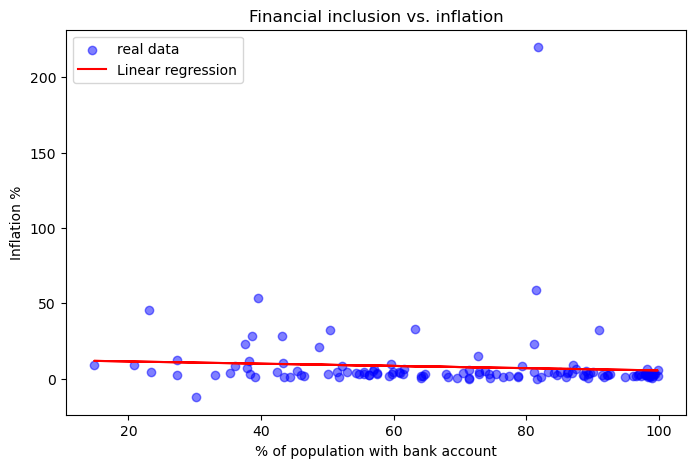

In [344]:
#OLS REGRESSION WITHOUT STANDARISED DATA

X = df_ml[['Account_Ownership']].values
y = df_ml['Inflation'].values

model_raw = LinearRegression()
model_raw.fit(X, y)
y_pred_raw = model_raw.predict(X)

print("--- REGRESSION WITHOUT STANDARISED DATA ---")
print(f"Intercepto: {model_raw.intercept_:.4f}")
print(f"Coeficiente: {model_raw.coef_[0]:.4f}")
print(f"R-cuadrado: {r2_score(y, y_pred_raw):.4f}")

# Gráfico 1
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, color='blue', label='real data')
plt.plot(X, y_pred_raw, color='red', label='Linear regression')
plt.title('Financial inclusion vs. inflation')
plt.xlabel('% of population with bank account')
plt.ylabel('Inflation %')
plt.legend()
plt.show()


--- STANDARISED ---
Coefficient: -0.0810
R-squared: 0.0066


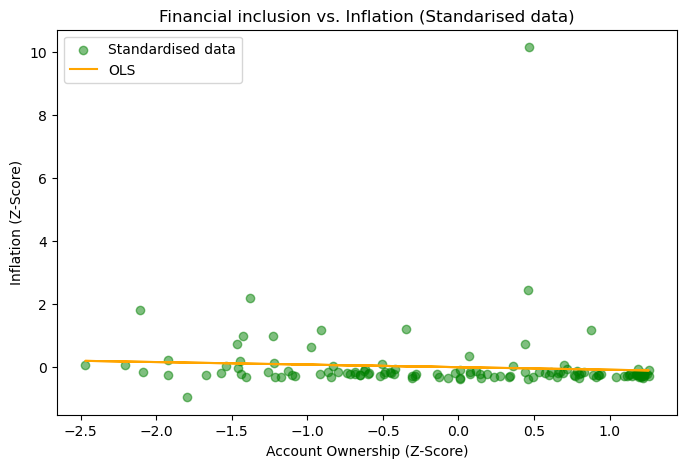

In [345]:
# OLS STANDARISED REGRESSION

# Using Scaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(X)
y_std = scaler_y.fit_transform(y.reshape(-1, 1))

model_std = LinearRegression()
model_std.fit(X_std, y_std)
y_pred_std = model_std.predict(X_std)

print("\n--- STANDARISED ---")
print(f"Coefficient: {model_std.coef_[0][0]:.4f}")
print(f"R-squared: {r2_score(y_std, y_pred_std):.4f}")

# Gráfico 2
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y_std, alpha=0.5, color='green', label='Standardised data')
plt.plot(X_std, y_pred_std, color='orange', label='OLS')
plt.title('Financial inclusion vs. Inflation (Standarised data)')
plt.xlabel('Account Ownership (Z-Score)')
plt.ylabel('Inflation (Z-Score)')
plt.legend()
plt.show()

In [348]:
# Droping outliers

# Limits for inflation
limite_superior = 10
limite_inferior = -10 

# Filtering original dataframe
df_clean = df_ml[(df_ml['Inflation'] <= limite_superior) & 
                 (df_ml['Inflation'] >= limite_inferior)].copy()

# Review dropped countries
outliers_high = df_ml[df_ml['Inflation'] > limite_superior]
outliers_low = df_ml[df_ml['Inflation'] < limite_inferior]

print(f"--- Dropped ---")
print(f"Hihg inflation dropped (> {limite_superior}%): {outliers_high['Country'].tolist()}")
print(f"Low inflation dropped (< {limite_inferior}%): {outliers_low['Country'].tolist()}")
print(f"Number of countries for model: {len(df_clean)}")


X_clean = df_clean[['Account_Ownership']].values
y_clean = df_clean['Inflation'].values

--- Dropped ---
Hihg inflation dropped (> 10%): ['Zambia', 'West Bank and Gaza', 'Turkiye', 'Sierra Leone', 'Pakistan', 'Nigeria', 'Malawi', 'Lebanon', 'Lao PDR', 'Iran, Islamic Rep.', 'Ghana', 'Gambia, The', 'Ethiopia', 'Egypt, Arab Rep.', 'Bangladesh', 'Argentina']
Low inflation dropped (< -10%): ['Iraq']
Number of countries for model: 115


--- Regression without outliers no standarised ---
Coefficient: -0.0274
R-squared: 0.0821


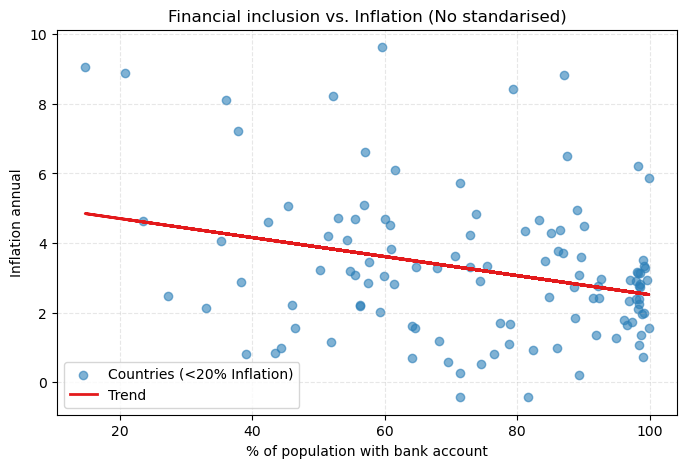

In [349]:
# OLS Regression filtered NO standardised
model_raw = LinearRegression()
model_raw.fit(X_clean, y_clean)
y_pred_raw = model_raw.predict(X_clean)

print("--- Regression without outliers no standarised ---")
print(f"Coefficient: {model_raw.coef_[0]:.4f}")
print(f"R-squared: {r2_score(y_clean, y_pred_raw):.4f}")

# Gráfico Escala Real
plt.figure(figsize=(8, 5))
plt.scatter(X_clean, y_clean, alpha=0.6, color='#2c7fb8', label='Countries (<20% Inflation)')
plt.plot(X_clean, y_pred_raw, color='#e31a1c', linewidth=2, label='Trend')
plt.title('Financial inclusion vs. Inflation (No standarised)')
plt.xlabel('% of population with bank account')
plt.ylabel('Inflation annual')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


--- REGRESIÓN ESTANDARIZADA (SIN OUTLIERS) ---
Coeficiente Estandarizado: -0.2866
R-cuadrado: 0.0821


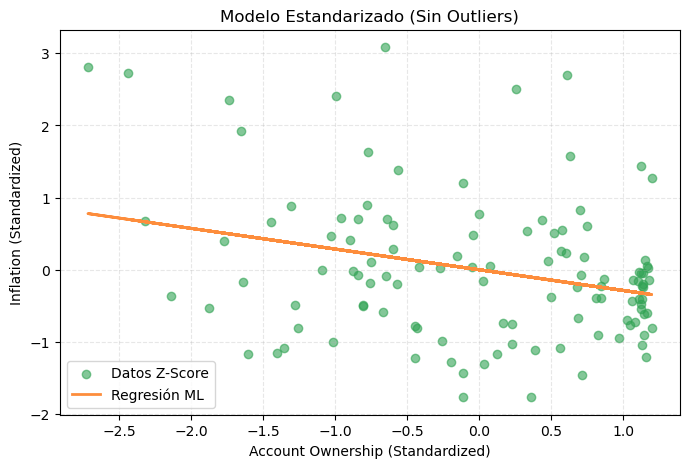

In [ ]:
# OLS regression standarised filtered data

# Standarisation
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(X_clean)
y_std = scaler_y.fit_transform(y_clean.reshape(-1, 1))

model_std = LinearRegression()
model_std.fit(X_std, y_std)
y_pred_std = model_std.predict(X_std)

print("\n--- Standarised Regression without outliers ---")
print(f"Coefficient: {model_std.coef_[0][0]:.4f}")
print(f"R-squared: {r2_score(y_std, y_pred_std):.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(X_std, y_std, alpha=0.6, color='#31a354', label='Datos Z-Score')
plt.plot(X_std, y_pred_std, color='#fd8d3c', linewidth=2, label='Regression')
plt.title('Financial inclusion vs. inflation (Standarised)')
plt.xlabel('Account Ownership (Standardized)')
plt.ylabel('Inflation (Standardized)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [355]:
# Run again model and export CSV for vegalite

df_final = df_ml[(df_ml['Inflation'] <= 10) & (df_ml['Inflation'] >= -10)].copy()

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(df_final[['Account_Ownership']])
y_std = scaler_y.fit_transform(df_final[['Inflation']])

model = LinearRegression()
model.fit(X_std, y_std)
y_pred = model.predict(X_std)

df_vega = pd.DataFrame({
    'Country': df_final['Country'],
    'ISO3': df_final['ISO3'],
    'Account_Ownership_Std': X_std.flatten(),
    'Inflation_Std': y_std.flatten(),
    'Regression_Line': y_pred.flatten(),
    'Real_Account_Ownership': df_final['Account_Ownership'],
    'Real_Inflation': df_final['Inflation']
})

print(f"Countries for the analysis: {len(df_final)}")

Countries for the analysis: 115


In [356]:
df_vega = pd.DataFrame({
    'Country': df_final['Country'],
    'ISO3': df_final['ISO3'],

    'Account_Ownership_Std': X_std.flatten(),
    'Inflation_Std': y_std.flatten(),
    'Regression_Line': y_pred.flatten(),

    'Real_Account_Ownership': df_final['Account_Ownership'],
    'Real_Inflation': df_final['Inflation']
})


df_vega.to_csv('p6/p6_data.csv', index=False)